In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.70898729, -0.4357981 , -0.46153897,  0.70550899,  0.57410257,
        -0.2316387 , -0.41414022,  0.47273373,  0.44863896, -0.76094154],
       [-0.56662734, -0.36455475, -0.71355648,  0.07205868,  0.19132448,
        -0.06818999, -0.65643034,  0.40145089, -0.87947609,  0.18669887]])

In [4]:
test_Features[:2]

array([[-0.81366407, -0.81164897, -0.91669401,  2.33563154,  2.18756197,
         0.15527611, -0.39962811,  0.01886379,  0.48746984,  0.01866689],
       [-0.73607649, -0.51681491, -1.00662469,  0.63603733,  0.34515965,
         0.36319272,  0.01096605,  0.35418507,  0.95542107,  0.02479564]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 0, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=20*7,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=20*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=20*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=20*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=20*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=20*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=20, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 140)               1540      
_________________________________________________________________
dense_2 (Dense)              (None, 120)               16920     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12100     
_________________________________________________________________
dense_4 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_5 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                820       
__________

In [19]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [20]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 2s - loss: 0.6895 - acc: 0.6412 - val_loss: 0.6839 - val_acc: 0.6373
Epoch 2/30
 - 0s - loss: 0.5839 - acc: 0.6500 - val_loss: 0.4812 - val_acc: 0.6373
Epoch 3/30
 - 0s - loss: 0.4436 - acc: 0.7817 - val_loss: 0.3699 - val_acc: 0.8489
Epoch 4/30
 - 0s - loss: 0.3669 - acc: 0.8458 - val_loss: 0.3530 - val_acc: 0.8627
Epoch 5/30
 - 0s - loss: 0.3491 - acc: 0.8586 - val_loss: 0.3401 - val_acc: 0.8640
Epoch 6/30
 - 0s - loss: 0.3374 - acc: 0.8625 - val_loss: 0.3272 - val_acc: 0.8693
Epoch 7/30
 - 0s - loss: 0.3316 - acc: 0.8641 - val_loss: 0.3190 - val_acc: 0.8739
Epoch 8/30
 - 0s - loss: 0.3252 - acc: 0.8647 - val_loss: 0.3154 - val_acc: 0.8778
Epoch 9/30
 - 0s - loss: 0.3242 - acc: 0.8663 - val_loss: 0.3118 - val_acc: 0.8745
Epoch 10/30
 - 0s - loss: 0.3147 - acc: 0.8687 - val_loss: 0.3115 - val_acc: 0.8778
Epoch 11/30
 - 0s - loss: 0.3149 - acc: 0.8696 - val_loss: 0.3049 - val_acc: 0.8739
Epoch 12/30
 - 0s - loss: 0.3086 - a

In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

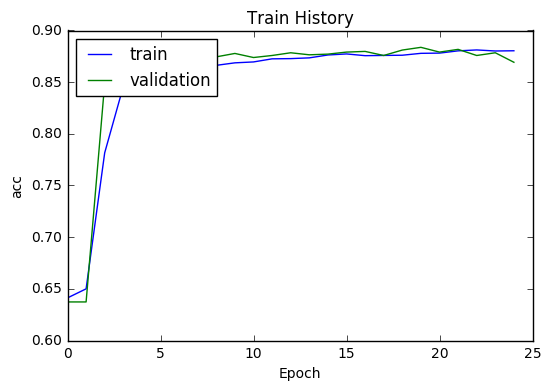

In [22]:
show_train_history(train_history,'acc','val_acc')

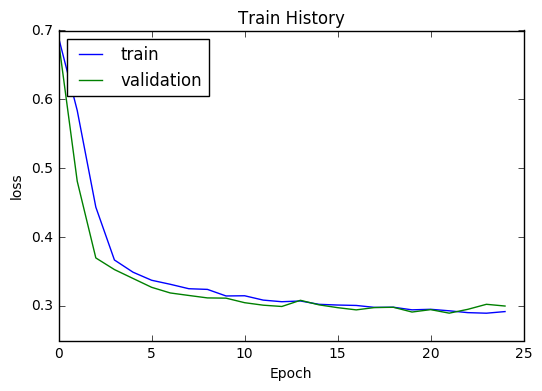

In [23]:
show_train_history(train_history,'loss','val_loss')

In [24]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 31us/step


In [25]:
scores[1]

0.8648790747836059